# **Brain Stroke Dataset Classification Prediction**

# **Import Library**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Business Understanding**

## **Business Objective**

Analisis pada dataset Brain Stroke bertujuan untuk memahami faktor-faktor kesehatan yang berhubungan dengan kejadian stroke. Fokus utama analisis ini meliputi usia (age), hipertensi (hypertension), penyakit jantung (heart_disease), kadar gula darah rata-rata (avg_glucose_level), BMI, dan kebiasaan merokok (smoking_status).

Melalui analisis ini diharapkan dapat diketahui faktor mana yang memiliki pengaruh paling signifikan terhadap kejadian stroke sehingga dapat menjadi dasar dalam upaya pencegahan maupun pengembangan model prediksi di tahap selanjutnya.

## **Assess Situation**
Dataset Brain Stroke berisi data pasien dengan berbagai atribut kesehatan serta satu variabel target yaitu stroke (0 = tidak stroke, 1 = stroke).

Berdasarkan pemeriksaan awal, dataset dalam kondisi bersih:
*   Tidak terdapat missing value
*   Tidak terdapat data duplikat
*   Tidak terdapat inkonsistensi kategori
*   Tipe data sudah sesuai dengan jenis variabel
Dengan kondisi tersebut, analisis dapat langsung difokuskan pada eksplorasi pola dan hubungan antar variabel.

## **Analytic Goals**

Tujuan analisis yang ingin dilakukan adalah:
*   Melihat hubungan usia dengan risiko stroke
*   Menganalisis pengaruh hipertensi terhadap stroke
*   Menganalisis pengaruh penyakit jantung terhadap stroke
*   Melihat pengaruh kadar gula darah terhadap stroke
*   Menganalisis pengaruh BMI terhadap stroke
*   Menganalisis pengaruh kebiasaan merokok terhadap stroke


## **Project Plan**

Tahapan analisis data yang akan dilakukan meliputi:
*   Memahami struktur dataset dan tipe data
*   Mengimpor dataset Brain Stroke
*   Membersihkan data (missing value, data duplikat, dan nilai tidak valid)
*   Melakukan analisis statistik deskriptif
*   Membuat visualisasi untuk melihat pola faktor risiko stroke
*   Menarik kesimpulan dan insight dari hasil analisis

# **Data Understanding**

## **Memuat Dataset**

In [6]:
file = '/content/drive/MyDrive/dataset praktikum/brain_stroke.csv'
df = pd.read_csv(file)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## **Informasi Dasar**

Dataset terdiri dari sejumlah baris data pasien dengan beberapa variabel numerik dan kategorikal. Kolom target dalam analisis ini adalah stroke.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Dataset terdiri dari 4981 baris dan 11 kolom.
Terdapat:
*   3 kolom bertipe float64 (age, avg_glucose_level, bmi)
*   3 kolom bertipe int64 (hypertension, heart_disease, stroke)
*   5 kolom bertipe object/kategorikal

Kolom target dalam analisis ini adalah stroke.

Semua kolom memiliki jumlah data yang sama (4981 non-null), sehingga tidak terdapat data kosong.

## **Informasi Statistik Deskriptif**

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000



*   Usia (age) memiliki rentang dari usia sangat muda hingga lanjut usia, dengan rata-rata berada pada kategori dewasa.
*   Avg_glucose_level memiliki rentang nilai yang cukup lebar, menunjukkan adanya variasi kadar gula antar pasien.
*   BMI menunjukkan variasi yang cukup tinggi antar individu.

Perbandingan antara mean dan median pada avg_glucose_level menunjukkan distribusi cenderung right-skewed, yang mengindikasikan adanya beberapa nilai tinggi yang memengaruhi rata-rata.


# **Verifikasi Kualitas Data**

In [9]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
hypertension,9.616543
heart_disease,5.520980
avg_glucose_level,12.085927
bmi,0.863280
stroke,4.978920


## **Data Type Check**

Seluruh kolom sudah memiliki tipe data yang sesuai dengan jenis variabelnya. Tidak diperlukan konversi tipe data.

In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


## **Cek Inconsistent Values**

In [16]:
print(df['gender'].unique())

['Male' 'Female']


Penjelasan:
Kolom gender memiliki dua kategori yaitu Male dan Female. Tidak ditemukan variasi penulisan yang berbeda sehingga tidak terdapat inkonsistensi pada kolom ini.

---



In [17]:
print(df['work_type'].unique())

['Private' 'Self-employed' 'Govt_job' 'children']


Penjelasan:
Kolom work_type memiliki beberapa kategori pekerjaan seperti Private, Self-employed, Govt_job, dan lainnya. Seluruh kategori sudah konsisten dan tidak ditemukan perbedaan format penulisan.

---



In [18]:
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Penjelasan:
Kolom smoking_status memiliki beberapa kategori seperti never smoked, formerly smoked, smokes, dan kemungkinan kategori lainnya sesuai output. Tidak ditemukan inkonsistensi format penulisan, sehingga data pada kolom ini sudah rapi dan siap dianalisis.

---



In [19]:
print(df['ever_married'].unique())

['Yes' 'No']


Penjelasan:
Kolom ever_married memiliki dua kategori yaitu Yes dan No. Tidak terdapat variasi huruf besar/kecil atau penulisan berbeda, sehingga tidak ditemukan inkonsistensi.

---



In [20]:
print(df['Residence_type'].unique())

['Urban' 'Rural']


Penjelasan:
Kolom Residence_type memiliki dua kategori yaitu Urban dan Rural. Format penulisan sudah konsisten dan tidak ditemukan perbedaan penulisan yang dapat menyebabkan kesalahan analisis.

## **Missing Values**

Tahapan:

*   Menggunakan fungsi isna() untuk mendeteksi nilai kosong (NaN).
*   Menjumlahkan seluruh nilai kosong di setiap kolom dengan sum().
*   Mengevaluasi apakah ada kolom yang memiliki nilai selain 0.


In [24]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
ever_married,0.0
work_type,0.0
Residence_type,0.0
avg_glucose_level,0.0
bmi,0.0
smoking_status,0.0


Penjelasan:
Hasil pengecekan menunjukkan seluruh kolom memiliki nilai 0 pada missing values. Artinya dataset tidak memiliki data kosong sehingga tidak diperlukan proses imputasi atau penghapusan baris.

## **Duplicated Values**

Tahapan:
*   Menggunakan fungsi duplicated() untuk mendeteksi baris yang memiliki isi data sama persis.
*   Menampilkan baris yang terduplikasi.
*   Mengevaluasi apakah terdapat data yang perlu dihapus.

In [23]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Tidak ditemukan data yang terduplikasi. Setiap baris merepresentasikan satu individu secara unik. Hal ini penting karena duplikasi dapat menyebabkan bias dalam analisis, terutama saat menghitung distribusi atau hubungan antar variabel.

## **Outliers Values**

Pada tahap ini dilakukan pemeriksaan nilai ekstrem (outliers) pada seluruh kolom numerik menggunakan metode Interquartile Range (IQR). Pemeriksaan ini bertujuan untuk mengetahui apakah terdapat nilai yang berada jauh di luar distribusi normal data dan berpotensi memengaruhi hasil analisis.

In [27]:
# Cek Outliers menggunakan metode IQR

results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers (%)': percent_outliers})

results_df = pd.DataFrame(results)
results_df

,Kolom,Persentase Outliers (%)
0,age,0.000000
1,hypertension,9.616543
2,heart_disease,5.520980
3,avg_glucose_level,12.085927
4,bmi,0.863280
5,stroke,4.978920


In [31]:
results_df.sort_values(by='Persentase Outliers (%)', ascending=False)

,Kolom,Persentase Outliers (%)
3,avg_glucose_level,12.085927
1,hypertension,9.616543
2,heart_disease,5.520980
5,stroke,4.978920
4,bmi,0.863280
0,age,0.000000


Variabel avg_glucose_level memiliki persentase outlier tertinggi, menunjukkan adanya pasien dengan kadar gula darah jauh di atas mayoritas data. Namun nilai tersebut masih memungkinkan secara medis sehingga tidak dihapus.


---

Variabel age tidak memiliki outlier, menunjukkan distribusi usia relatif stabil tanpa nilai ekstrem yang tidak wajar.

### **Visualisasi Outlier (Boxplot)**

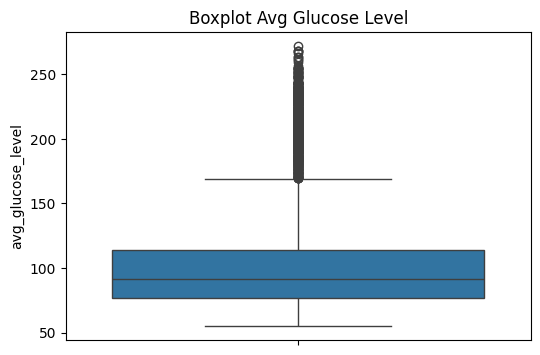

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['avg_glucose_level'])
plt.title('Boxplot Avg Glucose Level')
plt.show()

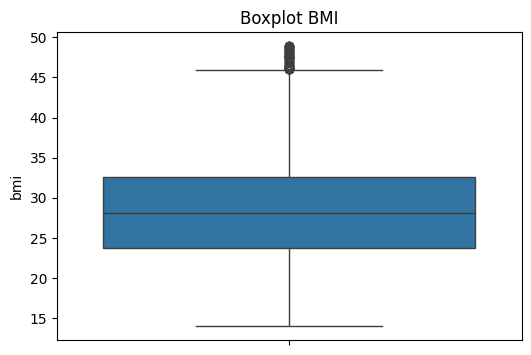

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['bmi'])
plt.title('Boxplot BMI')
plt.show()

Penjelasan Visualisasi

Dari boxplot terlihat adanya titik-titik di luar garis whisker, yang menunjukkan nilai ekstrem pada variabel avg_glucose_level dan bmi. Titik tersebut merupakan data pasien dengan kadar gula darah atau BMI yang jauh lebih tinggi dibanding mayoritas data.

Namun karena kondisi tersebut masih mungkin terjadi dalam konteks kesehatan (misalnya pada pasien diabetes atau obesitas), maka nilai outlier tidak dianggap sebagai kesalahan data dan tetap digunakan dalam analisis selanjutnya.

# **Eksplorasi Data (EDA)**

## **Comparison / Perbandingan**

Analisis:
>  Perbandingan dilakukan untuk melihat jumlah pasien yang mengalami stroke dan tidak mengalami stroke.

Tujuan:
>  Untuk mengetahui distribusi target dan melihat apakah dataset seimbang atau tidak.

Visualisasi:
>  Bar Chart (Grafik Batang)

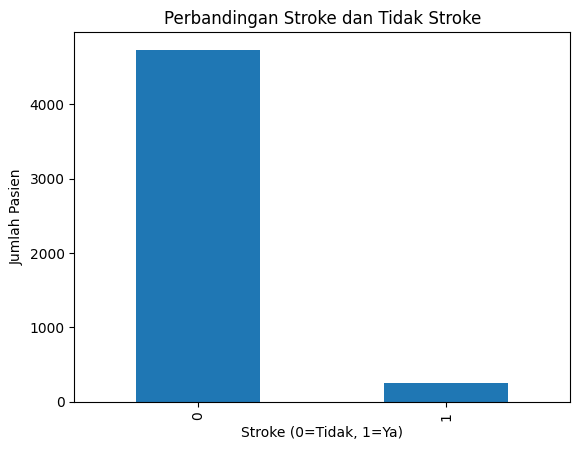

In [33]:
stroke_counts = df['stroke'].value_counts()

plt.figure()
stroke_counts.plot(kind='bar')
plt.title('Perbandingan Stroke dan Tidak Stroke')
plt.xlabel('Stroke (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Pasien')
plt.show()

Jumlah pasien tidak stroke jauh lebih banyak dibandingkan pasien stroke. Hal ini menunjukkan bahwa dataset bersifat tidak seimbang (imbalanced), di mana kasus stroke merupakan kelompok minoritas.

## **Composition / Komposisi**

Analisis:
>  Komposisi dilakukan untuk melihat proporsi pasien stroke terhadap keseluruhan data.

Tujuan:
>  Untuk mengetahui persentase kejadian stroke dalam dataset.

Visualisasi:
>  Pie Chart

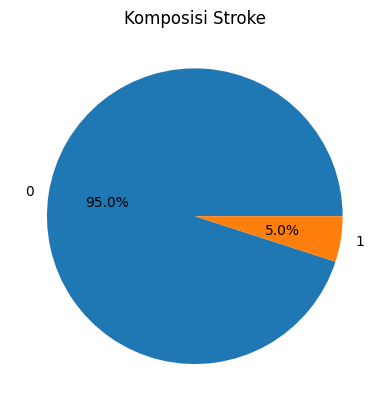

In [34]:
plt.figure()
stroke_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Komposisi Stroke')
plt.ylabel('')
plt.show()

Proporsi pasien stroke lebih kecil dibandingkan tidak stroke. Hal ini menunjukkan bahwa kejadian stroke dalam dataset tergolong rendah dibandingkan populasi keseluruhan.

## **Distribution / Distribusi**

Analisis:
>  Distribusi dilakukan pada variabel usia (age) untuk memahami pola penyebaran usia pasien.

Tujuan:
>  Untuk melihat kelompok usia mana yang paling dominan dan hubungannya terhadap risiko stroke.

Visualisasi:
>  Histogram

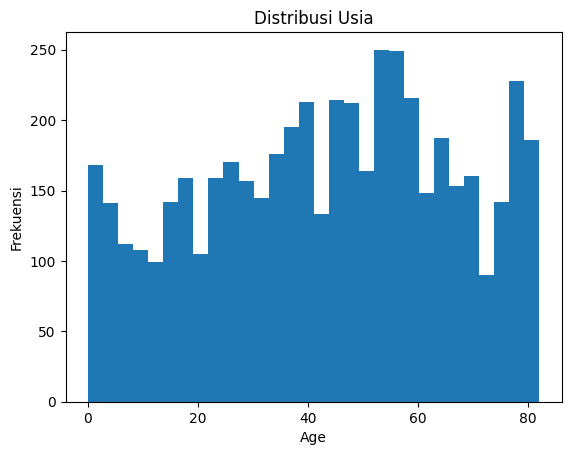

In [35]:
plt.figure()
df['age'].plot(kind='hist', bins=30)
plt.title('Distribusi Usia')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar pasien berada pada usia dewasa hingga lanjut usia. Kelompok usia yang lebih tinggi cenderung memiliki risiko stroke yang lebih besar.

## **Relationship / Hubungan**

Analisis:
>  Analisis hubungan dilakukan antara variabel numerik (age, avg_glucose_level, bmi) dengan stroke untuk melihat kekuatan hubungan antar variabel.

Tujuan:
>  Untuk mengetahui faktor mana yang memiliki hubungan paling kuat terhadap kejadian stroke.

Visualisasi:
>  Heatmap Korelasi

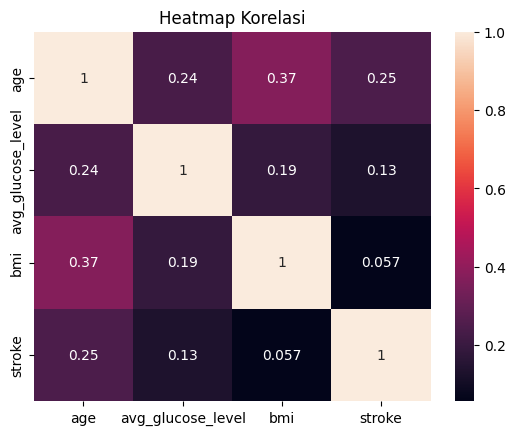

In [36]:
corr_data = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()

plt.figure()
sns.heatmap(corr_data, annot=True)
plt.title('Heatmap Korelasi')
plt.show()

Usia memiliki korelasi positif paling kuat terhadap stroke dibandingkan variabel numerik lainnya. Kadar gula darah dan BMI juga memiliki hubungan, namun relatif lebih lemah.

In [37]:
pd.crosstab(df['hypertension'], df['stroke'])

stroke,0,1
hypertension,,
0,4320,182
1,413,66


Penjelasan: Pasien dengan hipertensi menunjukkan proporsi stroke lebih besar dibandingkan pasien tanpa hipertensi, sehingga hipertensi dapat dianggap sebagai faktor risiko yang berhubungan dengan stroke.

In [38]:
pd.crosstab(df['heart_disease'], df['stroke'])

stroke,0,1
heart_disease,,
0,4505,201
1,228,47


Penjelasan: Pasien dengan riwayat penyakit jantung menunjukkan proporsi stroke yang lebih besar.

In [39]:
pd.crosstab(df['smoking_status'], df['stroke'])

stroke,0,1
smoking_status,,
Unknown,1453,47
formerly smoked,797,70
never smoked,1749,89
smokes,734,42


Penjelasan: Beberapa kategori perokok menunjukkan jumlah stroke lebih tinggi dibandingkan non-perokok.

# **Menyimpan Dataset**

In [41]:
df.to_csv('[clean]brain_stroke.csv', index=False)